Attempt at finding clusters in the events of GENIE16_CH datasets

In [1]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import mhn_tools as mytools
import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(999)
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "G16_CH_MEL_Events.csv", "G16_CH_PRAD_Events.csv"]
file_path=os.path.join( os.getcwd(), '..','data', file_names[2] )
input = pd.read_csv(file_path)
events=list(input.columns)[1:]
print(events)


['TP53 (M)', 'MCL1/1q (Amp)', 'TERT/5p (Amp)', 'KRAS (M)', 'CDKN2A/9p (Del)', 'MYC/8q (Amp)', 'EGFR/7p (Amp)', 'EGFR (M)', 'EPHA7/6q (Del)', 'BCL2/18q (Del)', 'RB1/13q (Del)', 'STK11 (M)', 'RBM10 (M)', 'KEAP1 (M)', 'SMARCA4 (M)', 'NF1 (M)', 'ATM (M)', 'PIK3CA (M)', 'BRAF (M)', 'ARID1A (M)', 'FAT1 (M)', 'SETD2 (M)', 'MET (M)', 'RB1 (M)', 'ERBB2 (M)', 'SMAD4 (M)', 'KMT2D (M)', 'ARID2 (M)', 'APC (M)', 'ATRX (M)', 'CH']


In [3]:
#cp.FORCE_EXECUTE_COMPUTATIONS=True
n_test_events=3
dist_measurer = edm.EventDistanceMeasurerCP(events[0:n_test_events],events[n_test_events:])
dist_measurer.load_data(input)
dist_measurer.train_All_MHNs(do_cv=False)
dist_measurer.compute_distance_matrix(edm.DIST.OFFDIAG_L1_SYM)

0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/TP53M_MCL11qAmp_TERT5pAmp
check if mbonart_checkpoints/edm_50acc87c6c830/TP53M_MCL11qAmp_TERT5pAmp   does exist


,KRAS (M),CDKN2A/9p (Del),MYC/8q (Amp),EGFR/7p (Amp),EGFR (M),EPHA7/6q (Del),BCL2/18q (Del),RB1/13q (Del),STK11 (M),RBM10 (M),...,SETD2 (M),MET (M),RB1 (M),ERBB2 (M),SMAD4 (M),KMT2D (M),ARID2 (M),APC (M),ATRX (M),CH
KRAS (M),0.00,9.22,11.83,12.90,11.03,8.83,10.03,10.43,7.38,7.21,...,7.36,11.54,13.80,9.81,9.65,10.52,10.61,12.06,11.25,6.95
CDKN2A/9p (Del),9.22,0.00,3.55,4.50,3.33,1.35,2.49,2.41,4.28,2.35,...,2.56,5.14,5.88,1.75,1.49,2.76,3.01,3.82,3.01,3.35
MYC/8q (Amp),11.83,3.55,0.00,1.45,3.50,3.16,2.74,2.34,5.13,5.04,...,5.37,5.73,2.35,2.40,2.38,2.79,3.30,1.63,1.58,6.16
EGFR/7p (Amp),12.90,4.50,1.45,0.00,3.61,4.37,3.79,2.87,6.58,6.25,...,6.44,6.96,3.06,3.29,3.45,3.16,3.73,1.92,1.93,7.25
EGFR (M),11.03,3.33,3.50,3.61,0.00,4.14,1.50,1.72,7.07,3.94,...,3.77,5.11,5.33,2.04,2.20,1.71,2.00,2.79,2.42,4.24
EPHA7/6q (Del),8.83,1.35,3.16,4.37,4.14,0.00,3.14,2.92,2.93,2.08,...,2.39,5.31,5.47,2.44,2.18,3.45,3.66,3.61,2.80,3.16
BCL2/18q (Del),10.03,2.49,2.74,3.79,1.50,3.14,0.00,1.56,5.89,2.82,...,2.73,4.01,4.93,1.60,1.10,1.63,1.94,2.85,2.04,3.52
RB1/13q (Del),10.43,2.41,2.34,2.87,1.72,2.92,1.56,0.00,5.63,3.56,...,3.91,5.37,3.69,0.90,0.98,0.53,1.10,1.77,1.00,4.68
STK11 (M),7.38,4.28,5.13,6.58,7.07,2.93,5.89,5.63,0.00,3.13,...,3.30,7.40,7.08,5.03,4.87,6.10,6.45,5.42,5.29,3.19
RBM10 (M),7.21,2.35,5.04,6.25,3.94,2.08,2.82,3.56,3.13,0.00,...,0.81,4.35,7.01,2.96,2.80,3.67,3.74,5.25,4.40,2.04


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


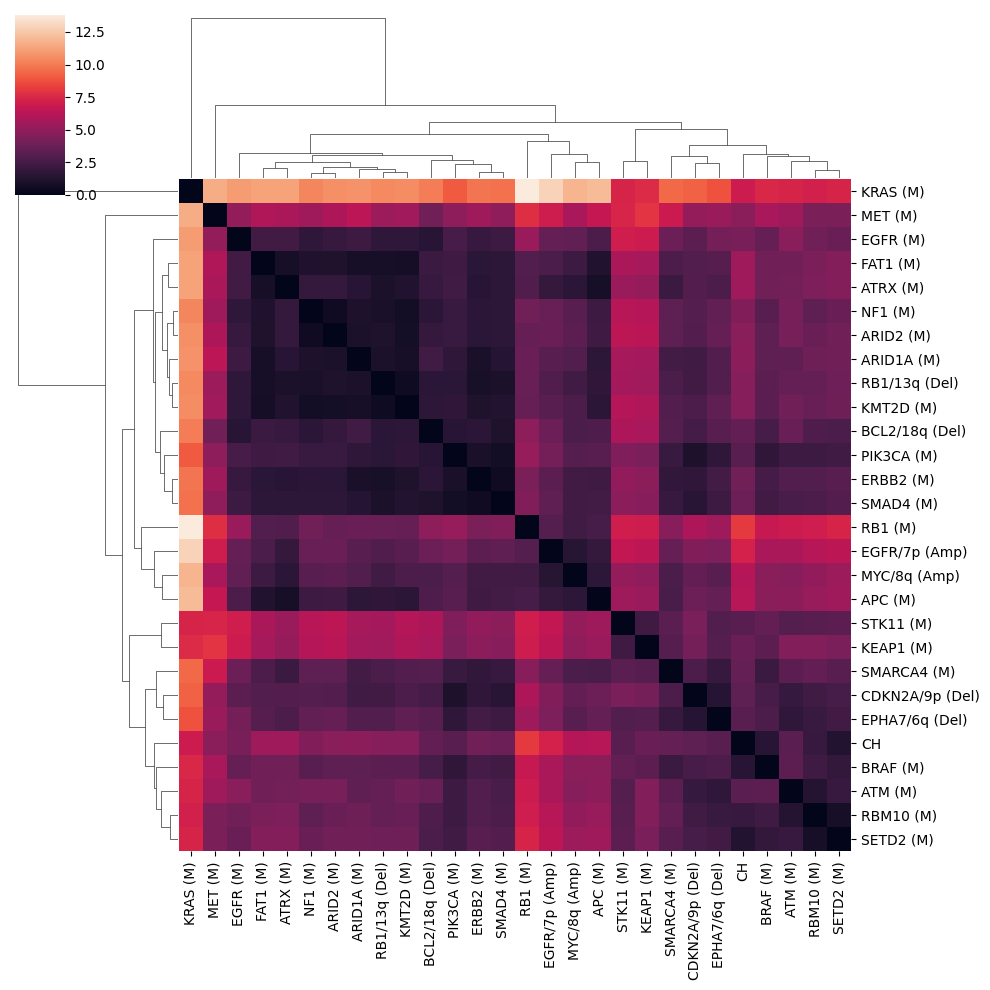

In [4]:
sns.clustermap(dist_measurer._dist_mat)


Here we use the same algorithm but with 4 test events (the 3 from before and KRAS)

0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/TP53M_MCL11qAmp_TERT5pAmp_KRASM
check if mbonart_checkpoints/edm_50acc87c6c830/TP53M_MCL11qAmp_TERT5pAmp_KRASM   does exist


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


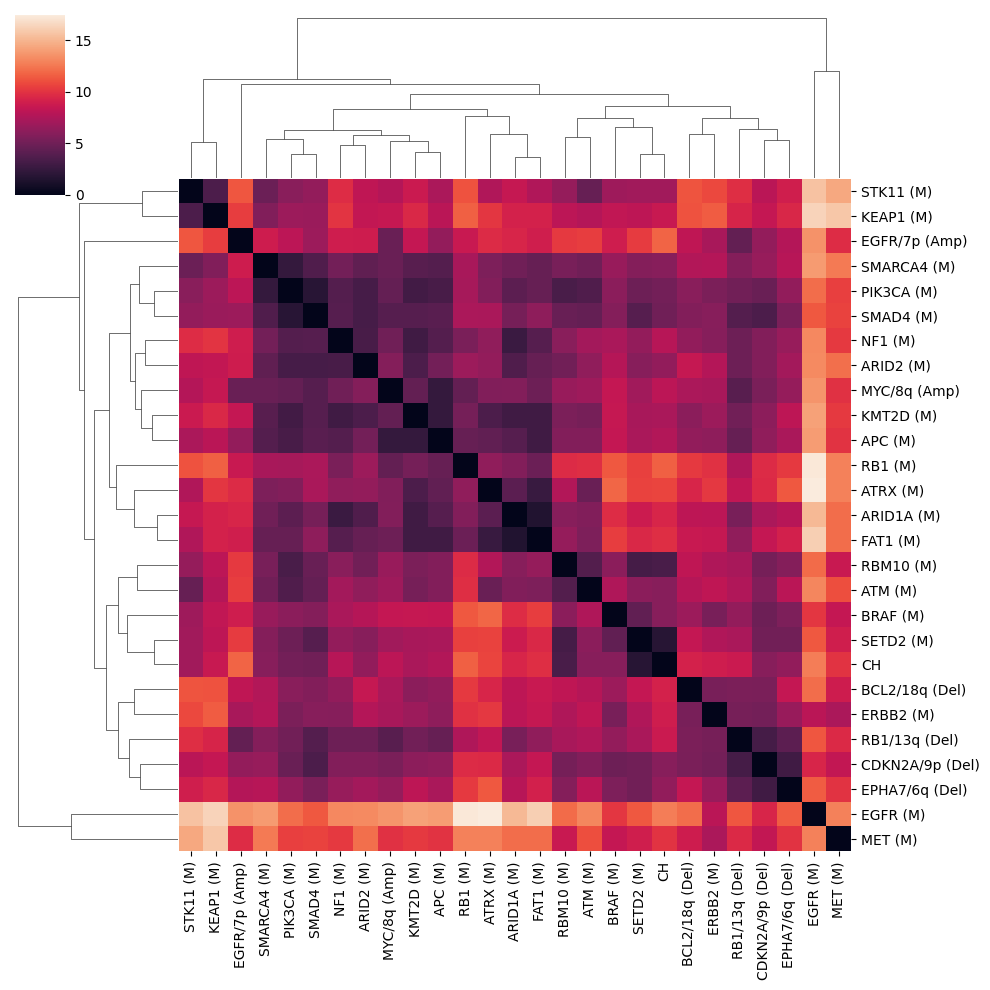

In [5]:
distance_measurer2=edm.getDistMeasurer(input, n_test_events=4)
sns.clustermap(distance_measurer2._dist_mat)

Analyse dataset for test events chosen by biological function

0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/TP53M_RB1M_RB113qDel
check if mbonart_checkpoints/edm_50acc87c6c830/TP53M_RB1M_RB113qDel   does exist
0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/EGFRM_METM_KRASM_BRAFM
check if mbonart_checkpoints/edm_50acc87c6c830/EGFRM_METM_KRASM_BRAFM   does exist
0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/STK11M_KEAP1M
check if mbonart_checkpoints/edm_50acc87c6c830/STK11M_KEAP1M   does exist
0x1.50acc87c6c830p+62
Directory for storage is edm_50acc87c6c830/STK11M_KEAP1M_KRASM
check if mbonart_checkpoints/edm_50acc87c6c830/STK11M_KEAP1M_KRASM   does exist


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-

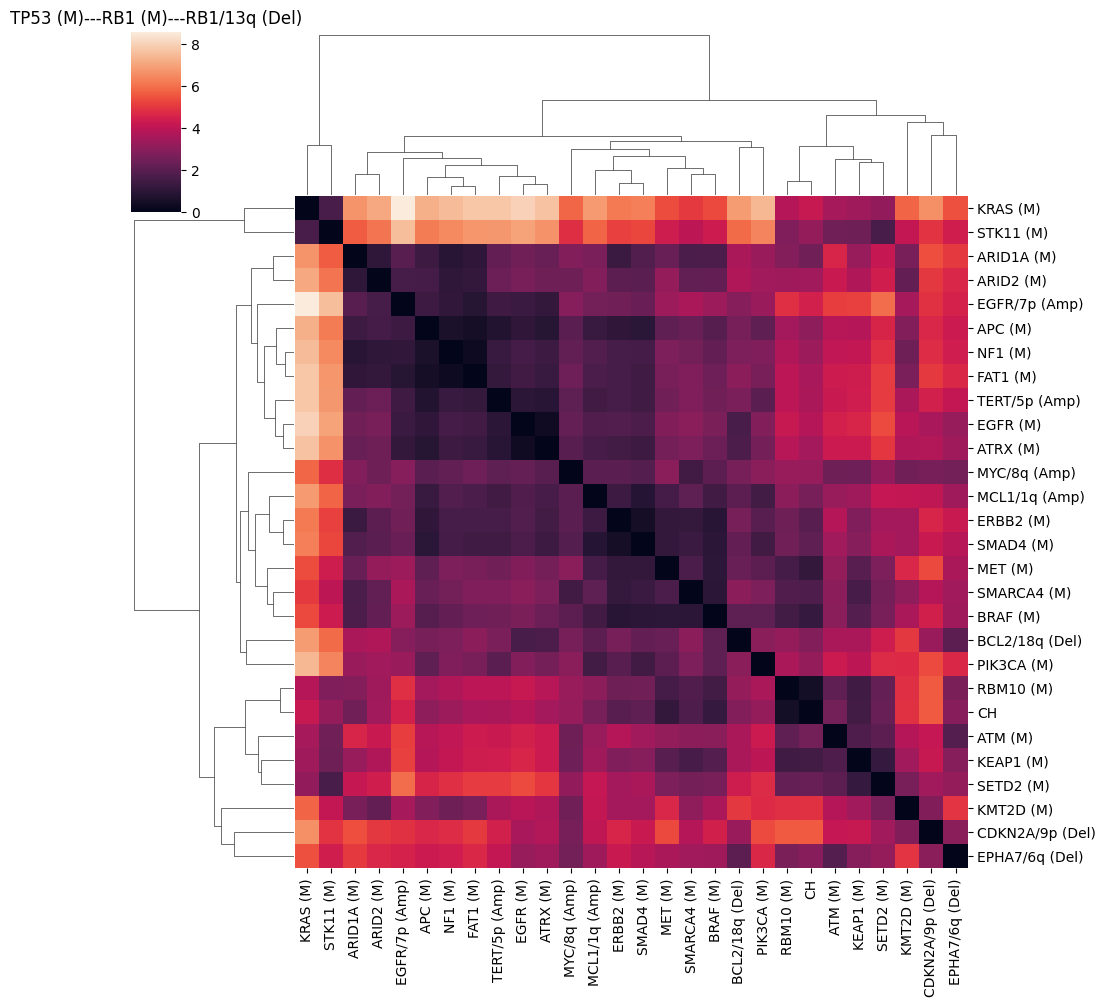

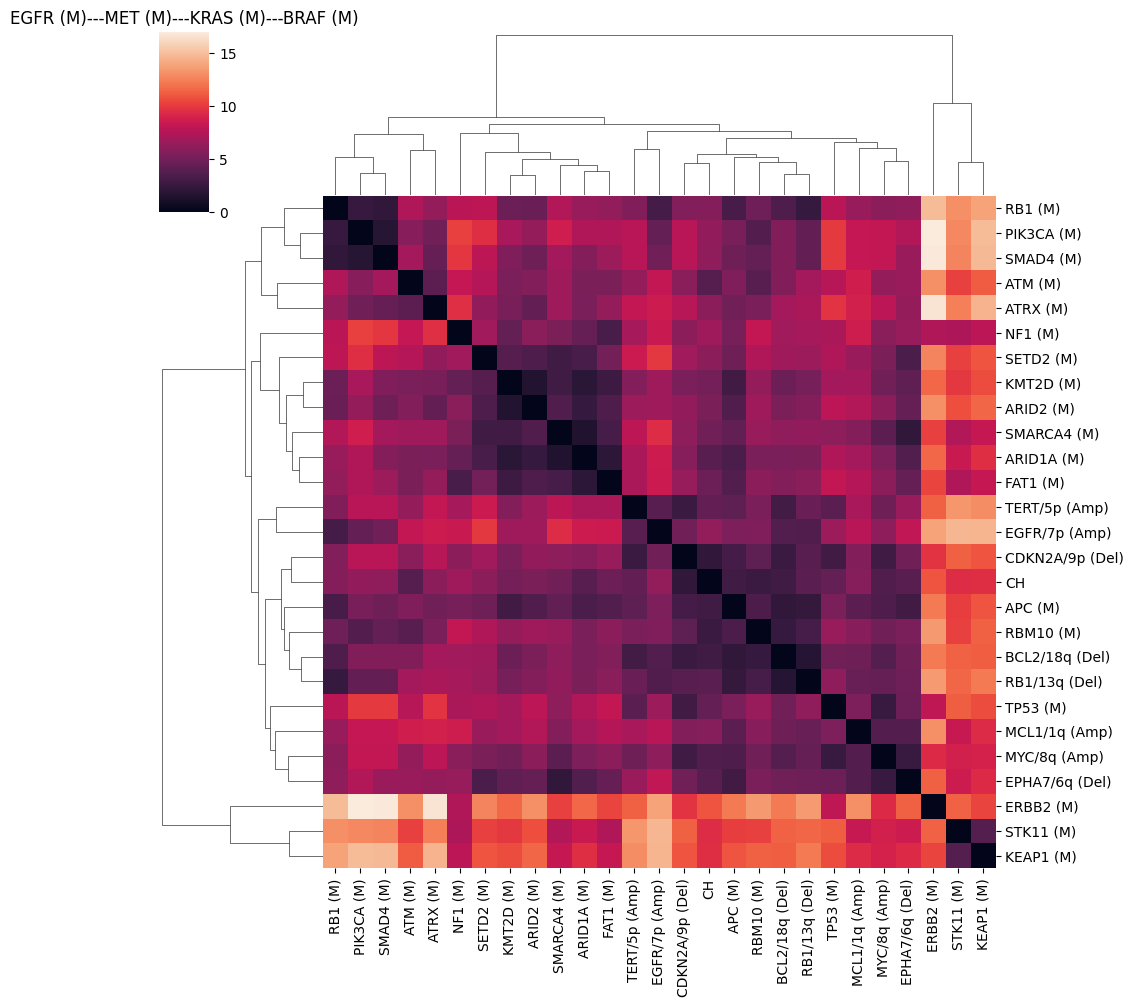

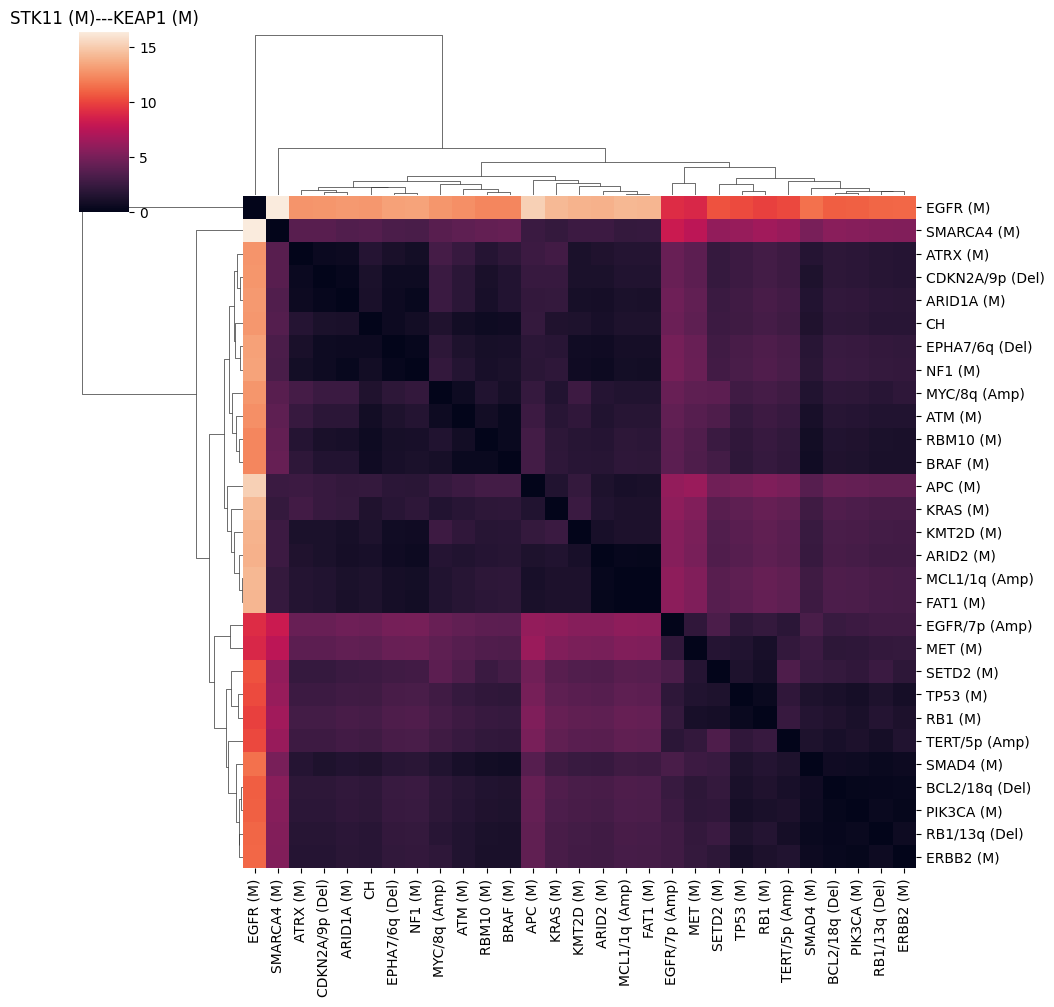

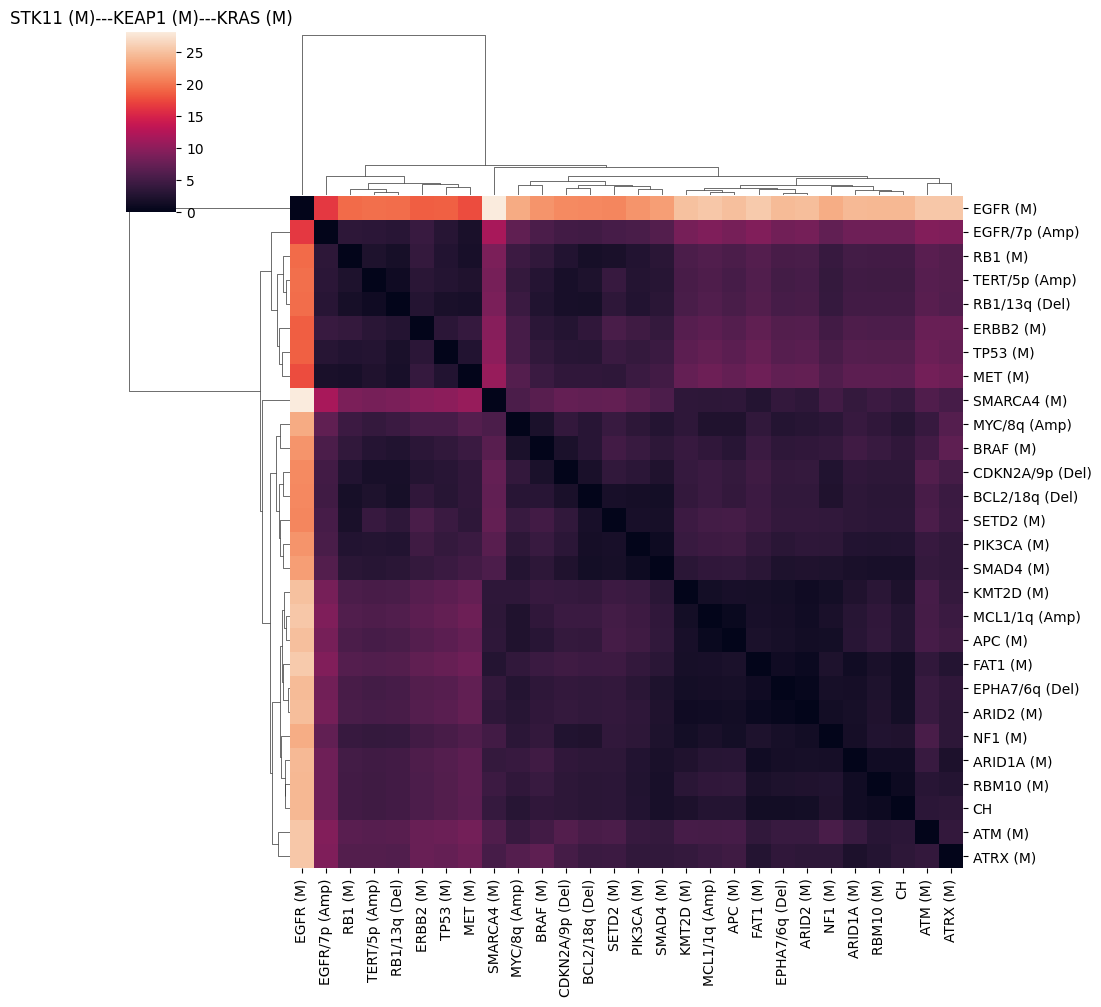

In [6]:
test_event_sets=[['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)'],['EGFR (M)', 'MET (M)', 'KRAS (M)', 'BRAF (M)'], ['STK11 (M)', 'KEAP1 (M)'],['STK11 (M)', 'KEAP1 (M)','KRAS (M)']]
dist_measurers=[]


for test_event_set in test_event_sets:
    dist_measurers.append(edm.getDistMeasurer(input, test_event_set=test_event_set))

for test_event_set, dist_m in zip(test_event_sets,dist_measurers):
    sns.clustermap(dist_m._dist_mat)
    plt.title('---'.join(test_event_set),loc='center')

(<matplotlib.image.AxesImage at 0x1bb48d316a0>,
 <matplotlib.colorbar.Colorbar at 0x1bb48814410>)

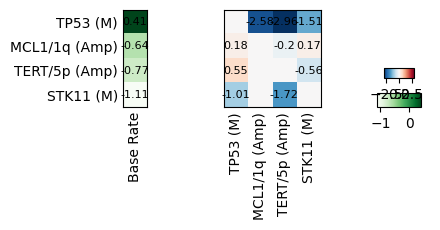

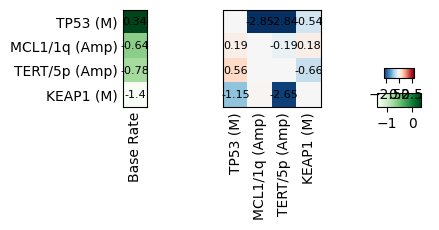

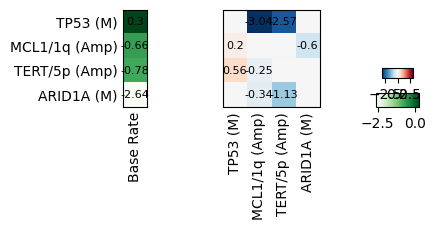

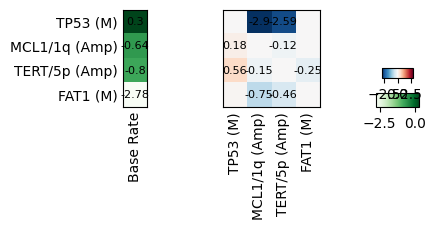

In [7]:
#print(dist_measurer._init_theta)

#dist_measurer._mhns['RB1 (M)'].plot()
#dist_measurer._mhns['ERBB2 (M)'].plot()


dist_measurer._mhns['STK11 (M)'].plot()
dist_measurer._mhns['KEAP1 (M)'].plot()

dist_measurer._mhns['ARID1A (M)'].plot()
dist_measurer._mhns['FAT1 (M)'].plot()

In [8]:
print(dist_measurer._lam_test)
print(1/len(input))

for ev in dist_measurer._events:
    dist_measurer._mhns[ev].plot()

AttributeError: 'EventDistanceMeasurerCP' object has no attribute '_lam_test'